In [132]:
# To make debugging of linear_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of linear_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys

sys.path.append("../..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [linear_regression](https://github.com/trekhleb/homemade-machine-learning/blob/master/src/linear_regression/linear_regression.py) - custom implementation of linear regression

In [133]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from homemade.utils.metrics import Metrics
from homemade.utils.array import Array
from homemade.linear_regression.linear_regression import LinearRegression

In [134]:
# Load the data.
data = pd.read_csv("../data/world-happiness-report-2017.csv")

# Print the data table.
data.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


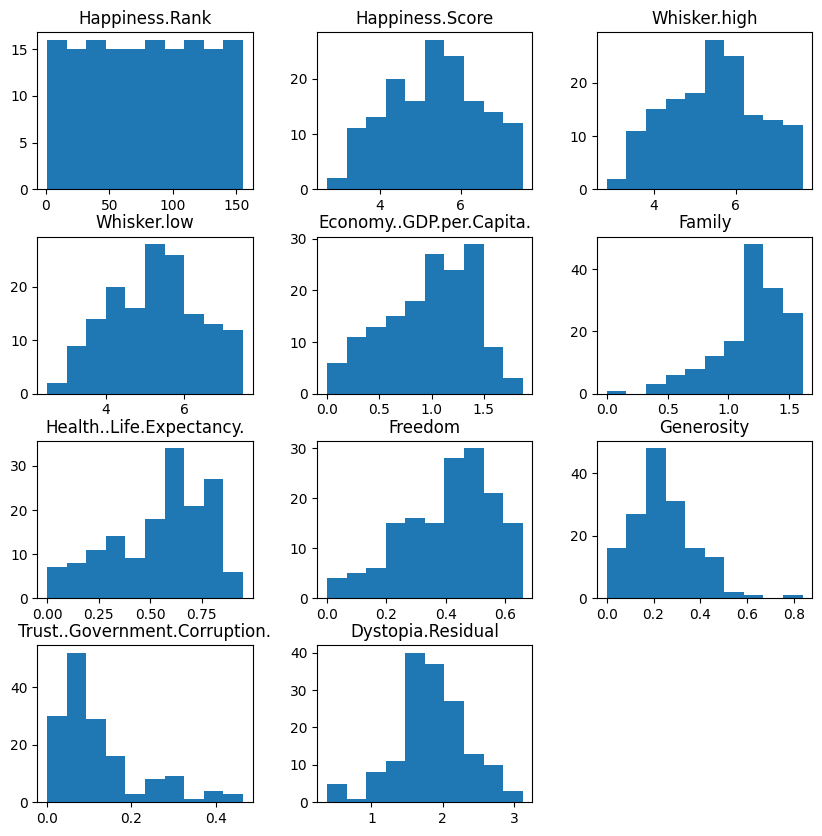

In [135]:
# Print histograms for each feature to see how they vary.
histohrams = data.hist(grid=False, figsize=(10, 10))

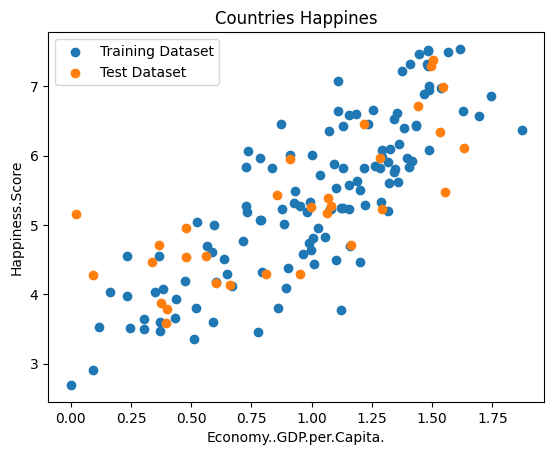

In [136]:
# Split data set on training and test sets with proportions 80/20.
# Function sample() returns a random sample of items.
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

# Decide what fields we want to process.
input_param_name = "Economy..GDP.per.Capita."
output_param_name = "Happiness.Score"

# Split training set input and output.
x_train = train_data[[input_param_name]].values
y_train = train_data[output_param_name].values

# Split test set input and output.
x_test = test_data[[input_param_name]].values
y_test = test_data[output_param_name].values

# Plot training data.
plt.scatter(x_train, y_train, label="Training Dataset")
plt.scatter(x_test, y_test, label="Test Dataset")
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title("Countries Happines")
plt.legend()
plt.show()

In [137]:
# setup data, convert to Array for training
X_train = Array(x_train.tolist())
Y_train = Array(y_train.tolist())
X_test = Array(x_test.tolist())
Y_test = Array(y_test.tolist())

## Init linear regression instance.
linear_regression = LinearRegression(X_train, Y_train)

learning_rate = 0.01
iterations = 500

slope, intercept, cost_history = linear_regression.train(
    learning_rate=learning_rate, iterations=iterations
)

Model parameters after 0 iterations: Cost: 30.337020106009412, slope: Array([0]), intercept: 0
Model parameters after 100 iterations: Cost: 0.9459048403339654, slope: Array([0.823606692162635]), intercept: 4.6722496887876375
Model parameters after 200 iterations: Cost: 0.428975474358657, slope: Array([0.9328330459091904]), intercept: 5.291881367544053
Model parameters after 300 iterations: Cost: 0.4198837482709539, slope: Array([0.9473185964350619]), intercept: 5.374056645599048
Optimization finished after 348 iterations.
Final parameters: Cost: 0.4197443837060089, slope: Array([0.9486935716005511]), intercept: 5.381856761054863


0.7596897379039854


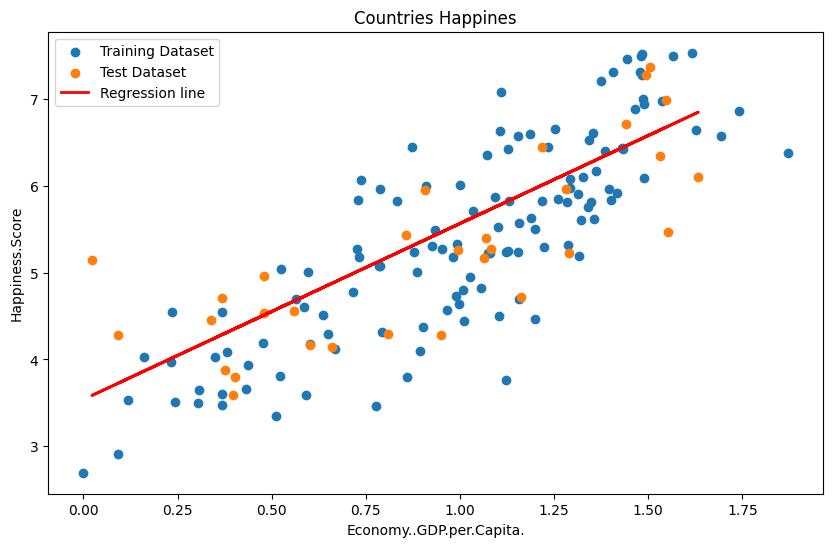

In [138]:
# test trained model with test data
y_predict = linear_regression.predict(X_test, slope, intercept)

# evaluate the model accuracy with RMSE
mse = Metrics.mean_absolute_error(Y_test, y_predict)
rmse = math.sqrt(mse)
print(rmse)

# prepare to plot result
x_test = x_test.reshape(31,)
y_predict = np.array([[item] for item in y_predict.data])

# visualize results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label="Training Dataset")
plt.scatter(x_test, y_test, label="Test Dataset")
plt.plot(x_test, y_predict, color="red", linewidth=2, label="Regression line")
plt.xlabel("Economy..GDP.per.Capita.")
plt.ylabel("Happiness.Score")
plt.title("Countries Happines")
plt.legend()
plt.show()